In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*大同.txt")
    return files
textfile=textfile()
textfile

['./files\\20111008大同.txt',
 './files\\20140814大同.txt',
 './files\\20150615大同.txt',
 './files\\20160618大同.txt',
 './files\\20160928大同.txt',
 './files\\20170506大同.txt',
 './files\\20180228大同.txt',
 './files\\20180323大同.txt',
 './files\\20181105大同.txt',
 './files\\20181110大同.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['股東臨時會','智冠','大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.656 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '台灣',
 '之爭',
 '表示',
 '億元',
 '今年',
 '指出',
 '記者',
 '台紙',
 '智冠',
 '榮剛',
 '台苯',
 '遊戲',
 '目前',
 '去年']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['台湾 董事 林蔚山 挪用 亿求 刑年 坚信 老董 清白 来源 台海 网 刘强 用 手持 设备 访问 台海 网月 日讯 据 台湾 联合报 报道 台湾 集团 董事长 林蔚山 被控 擅自 挪用 资金 达 亿元 新台币 下同 以 填补 私人 投资 通达 国际 昨天 新北市 板桥 检方 依 违反 台湾 证券交易 法 及 背信 罪 起诉 林蔚山 通达 国际 执行长 周云楠 两人 都 求刑 据 台媒 了解 同案 被 起诉 有人 包括 台湾 前 财务 长许 嘉成 子公司 尚志 资产 主计长 黄仁宏 等 重要 财务 干部 另有 五名 通达 职员 认罪 配合 调查 检方 建请 从轻 量刑 或 缓刑 板桥 检方 一年 多前 侦办 生产 笔记本电脑 通达 国际 伪造文书 案时 意外 查 到 台湾 集团 董事长 林蔚山 在 年前 以 个人 名义 投资 担任 通达 董事 及 连带保证 而后 通达 因 经营不善 亏损 连 连 过去 多来 林蔚山 为 要 补 这个 钱坑 及 避免 个人 遭 银行 催收 巨额 债务 陆续 安排 台湾 子公司 尚志 投资 入主 通达 并 取得 经营权 再 以 借款 名义 挪用 台湾 集团 资金 挹注 亏损 通达 后来 林蔚山 将 借款 改为 投资 款 并 将 挹注 通达 多亿元 转嫁 为 台湾 集团 呆帐 并 在 缴清 债务 和 贷款 后 解散 通达 检方 林蔚山 年前 为 投资 另一家 科技 要求 周云楠 指示 通达 财务人员 挪用 通达 账户 万元 汇入 这家 科技 账户 使林 成为 这家 科技 股东 对 资金 已 短少 通达 更是 雪上加霜 检调 搜索 通达 过滤 比 对 通达 帐目 后 林蔚山 才 以 返还 借款 为 由 在 去 年月日 和 日 将 借款 本金 和 利息 万元 汇入 通达 账户 坚信 老董 清白 另据 台湾 经济日报 报道 日 晚间 紧急 与 律师团 研商 对应 之策 并 发出 声明 稿 林蔚山 尚未 接获 起诉书 无从 为 任何 评论 但 坚决 相信 并 支持 林蔚山 清白 林蔚山 为 受害人 通达 案仅经 一次 开庭 相关 证据 调查 未臻 详实 且 未 给予 充分 答辩 机会 令人遗憾 强调 相信 经 司法 审理 在 充分 详查 整体 过程 后 定能 还 林蔚山 清白 林蔚山 将 继续 向 司法机关 提出 说明 以 还原 事实真相 及

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1480


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (10, 1480)


<10x1480 sparse matrix of type '<class 'numpy.float64'>'
	with 1883 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
万元 0.0677016410931504 0 20
个人 0.1015524616397256 0 70
亏损 0.0677016410931504 0 97
借款 0.1354032821863008 0 172
债务 0.0677016410931504 0 174
充分 0.0677016410931504 0 195
台海 0.0677016410931504 0 337
台湾 0.338508205465752 0 338
名义 0.0677016410931504 0 353
周云楠 0.0677016410931504 0 359
国际 0.1015524616397256 0 388
坚信 0.0677016410931504 0 399
年前 0.0677016410931504 0 543
投资 0.169254102732876 0 626
报道 0.0677016410931504 0 630
挪用 0.1354032821863008 0 645
挹注 0.0677016410931504 0 646
板桥 0.0677016410931504 0 801
林蔚山 0.22540188694976346 0 810
检方 0.2031049232794512 0 824
求刑 0.0677016410931504 0 864
汇入 0.0677016410931504 0 865
清白 0.169254102732876 0 883
相信 0.0677016410931504 0 976
科技 0.07552756022044296 0 998
老董 0.0677016410931504 0 1086
董事长 0.0677016410931504 0 1148
调查 0.0677016410931504 0 1214
财务 0.1015524616397256 0 1242
账户 0.1015524616397256 0 1244
资金 0.1015524616397256 0 1247
起诉 0.0677016410931504 0 1254
这家 0.1015524616397256 0 1296
通达 0.5754639492917785 0 1310
集团 0.1354032821863008

整體 0.06680815084159399 3 709
明年 0.056793031806580505 3 734
昨日 0.13361630168318797 3 739
有責任 0.06680815084159399 3 773
未來 0.056793031806580505 3 780
東屬 0.06680815084159399 3 796
東應 0.06680815084159399 3 797
板橋 0.056793031806580505 3 802
林蔚山 0.08897086109094776 3 810
機會 0.06680815084159399 3 833
每股 0.056793031806580505 3 860
淨值 0.11358606361316101 3 879
減虧 0.13361630168318797 3 885
滿載 0.06680815084159399 3 890
為盈 0.056793031806580505 3 898
現金 0.06680815084159399 3 935
申請 0.056793031806580505 3 950
發電 0.06680815084159399 3 968
破釜沉舟 0.06680815084159399 3 986
福州 0.06680815084159399 3 993
稅後淨損 0.06680815084159399 3 1002
稼動率 0.06680815084159399 3 1003
第季 0.13361630168318797 3 1021
結果 0.056793031806580505 3 1041
結構 0.056793031806580505 3 1042
經營 0.05931390739396518 3 1049
綠能 0.1987487670680382 3 1053
總兩人 0.06680815084159399 3 1057
總經理林 0.056793031806580505 3 1059
美幸 0.06680815084159399 3 1077
群聲 0.06680815084159399 3 1079
而定 0.06680815084159399 3 1090
能否 0.056793031806580505 3 1119
自救 0.056793

人士 0.05795538697059467 6 105
修法 0.10226322081204188 6 170
元大關 0.10226322081204188 6 193
公司法 0.07605617277520108 6 208
再起 0.13635096108272252 6 239
出任 0.1448884674264867 6 241
加上 0.07605617277520108 6 281
加碼 0.20452644162408376 6 282
即可 0.10226322081204188 6 296
及林 0.06817548054136126 6 303
只要 0.05070411518346738 6 324
召開 0.10140823036693476 6 325
回應 0.05795538697059467 6 378
場派 0.06817548054136126 6 408
外界 0.06817548054136126 6 417
多次 0.05795538697059467 6 425
大同市 0.06817548054136126 6 429
奇襲 0.05795538697059467 6 455
密謀 0.17043870135340314 6 491
左右 0.06817548054136126 6 525
市場 0.28247837351737476 6 532
帳戶 0.06817548054136126 6 538
引人 0.06817548054136126 6 561
才剛 0.06817548054136126 6 617
持續 0.05070411518346738 6 640
挑戰 0.10140823036693476 6 644
接下 0.13635096108272252 6 655
推舉 0.17043870135340314 6 662
易主 0.06817548054136126 6 735
是否 0.20452644162408376 6 741
本刊 0.10226322081204188 6 783
查明 0.06817548054136126 6 815
欲爭 0.06817548054136126 6 847
派將 0.06817548054136126 6 873
漲到 0.0681754

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files\20111008大同.txt,./files\20140814大同.txt,./files\20150615大同.txt,./files\20160618大同.txt,./files\20160928大同.txt,./files\20170506大同.txt,./files\20180228大同.txt,./files\20180323大同.txt,./files\20181105大同.txt,./files\20181110大同.txt
0,一世,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044938,0.000000
1,一些,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034088,0.000000,0.000000,0.000000
2,一再,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096082,0.000000,0.000000
3,一切,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079236
4,一切正常,0.033851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,一同,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039618
6,一大,0.000000,0.000000,0.000000,0.000000,0.073578,0.000000,0.000000,0.000000,0.038201,0.000000
7,一审,0.033851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一席,0.000000,0.000000,0.000000,0.000000,0.147156,0.000000,0.028978,0.000000,0.000000,0.000000
9,一年,0.033851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files\20111008大同.txt,./files\20140814大同.txt,./files\20150615大同.txt,./files\20160618大同.txt,./files\20160928大同.txt,./files\20170506大同.txt,./files\20180228大同.txt,./files\20180323大同.txt,./files\20181105大同.txt,./files\20181110大同.txt
0,一世,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044938,0.000000
1,一些,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034088,0.000000,0.000000,0.000000
2,一再,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096082,0.000000,0.000000
3,一切,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079236
4,一切正常,0.033851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,一同,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039618
6,一大,0.000000,0.000000,0.000000,0.000000,0.073578,0.000000,0.000000,0.000000,0.038201,0.000000
7,一审,0.033851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一席,0.000000,0.000000,0.000000,0.000000,0.147156,0.000000,0.028978,0.000000,0.000000,0.000000
9,一年,0.033851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.09608198, ..., 0.        , 0.        ,
        0.        ],
       [0.04493783, 0.        , 0.        , ..., 0.04493783, 0.08987566,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03961781]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一世,0,0,0,0,0,0,0,0,1,0
1,一些,0,0,0,0,0,0,1,0,0,0
2,一再,0,0,0,0,0,0,0,1,0,0
3,一切,0,0,0,0,0,0,0,0,0,2
4,一切正常,1,0,0,0,0,0,0,0,0,0
5,一同,0,0,0,0,0,0,0,0,0,1
6,一大,0,0,0,0,1,0,0,0,1,0
7,一审,1,0,0,0,0,0,0,0,0,0
8,一席,0,0,0,0,2,0,1,0,0,0
9,一年,1,0,0,0,0,0,0,0,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一世,0,0,0,0,0,0,0,0,1,0
1,一些,0,0,0,0,0,0,1,0,0,0
2,一再,0,0,0,0,0,0,0,1,0,0
3,一切,0,0,0,0,0,0,0,0,0,2
4,一切正常,1,0,0,0,0,0,0,0,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一世,0,0,0,0,0,0,0,0,1,0
1,一些,0,0,0,0,0,0,1,0,0,0
2,一再,0,0,0,0,0,0,0,1,0,0
3,一切,0,0,0,0,0,0,0,0,0,2
4,一切正常,1,0,0,0,0,0,0,0,0,0
5,一同,0,0,0,0,0,0,0,0,0,1
6,一大,0,0,0,0,1,0,0,0,1,0
7,一审,1,0,0,0,0,0,0,0,0,0
8,一席,0,0,0,0,2,0,1,0,0,0
9,一年,1,0,0,0,0,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一世': 1,
 '一些': 1,
 '一再': 1,
 '一切': 2,
 '一切正常': 1,
 '一同': 1,
 '一大': 2,
 '一审': 1,
 '一席': 3,
 '一年': 1,
 '一度': 3,
 '一旦': 3,
 '一期': 1,
 '一次': 1,
 '一直': 4,
 '一系列': 2,
 '一般': 1,
 '一路': 1,
 '一遭': 1,
 '七個': 1,
 '万元': 2,
 '三圓': 2,
 '三圓加碼': 1,
 '三圓建設': 5,
 '三審': 1,
 '三期': 1,
 '上半年': 2,
 '上市': 2,
 '上市公司': 1,
 '上櫃': 1,
 '上演': 3,
 '上漲': 1,
 '上訴': 2,
 '上路': 1,
 '上述': 1,
 '下半年': 1,
 '下台': 1,
 '下同': 1,
 '不予': 1,
 '不佳': 2,
 '不僅': 1,
 '不僅連': 1,
 '不利于': 1,
 '不及': 1,
 '不同': 1,
 '不夠': 1,
 '不振': 1,
 '不斷': 5,
 '不是': 3,
 '不會': 4,
 '不服': 1,
 '不符': 1,
 '不缺': 1,
 '不能': 3,
 '不要': 1,
 '不見': 1,
 '不足': 1,
 '不过': 1,
 '不退': 1,
 '不過': 2,
 '且林': 1,
 '世界': 1,
 '业务': 1,
 '丟失': 1,
 '两人': 1,
 '並執行': 1,
 '並揚': 1,
 '並擔': 2,
 '並未': 1,
 '並積極': 1,
 '个人': 3,
 '中國': 1,
 '中學': 1,
 '中心': 1,
 '中資': 1,
 '主管': 3,
 '主计长': 1,
 '之一': 1,
 '之久': 1,
 '之前': 1,
 '之力': 1,
 '之後在': 1,
 '之手': 1,
 '之策': 1,
 '之詐': 1,
 '之資金將': 1,
 '之間': 1,
 '也僅': 1,
 '了解': 2,
 '予以': 1,
 '事实真相': 1,
 '事實': 1,
 '事業': 3,
 '事業部': 1,
 '事業體': 1,
 '二审': 1,
 '二審': 1,
 '亏损': 

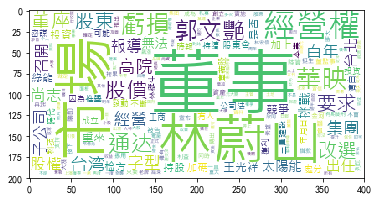

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [20]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('董事', 57),
 ('市場', 39),
 ('林蔚山', 37),
 ('經營權', 36),
 ('華映', 21),
 ('虧損', 20),
 ('郭文艷', 18),
 ('通达', 17),
 ('股價', 16),
 ('股東', 13),
 ('董座', 13),
 ('要求', 13),
 ('改選', 12),
 ('台湾', 10),
 ('高院', 10),
 ('字型', 9),
 ('百年', 9),
 ('經營', 9),
 ('集團', 9),
 ('報導', 8),
 ('子公司', 8),
 ('尚志', 8),
 ('股權', 8),
 ('出任', 7),
 ('召開', 7),
 ('台北', 7),
 ('太陽能', 7),
 ('挑戰', 7),
 ('無法', 7),
 ('王光祥', 7)]

In [21]:
data = []
for t in ten[:15]:
    data.append(t[1])
label = []
for t in ten[:15]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xff10358>,
 <a list of 15 Text xticklabel objects>)

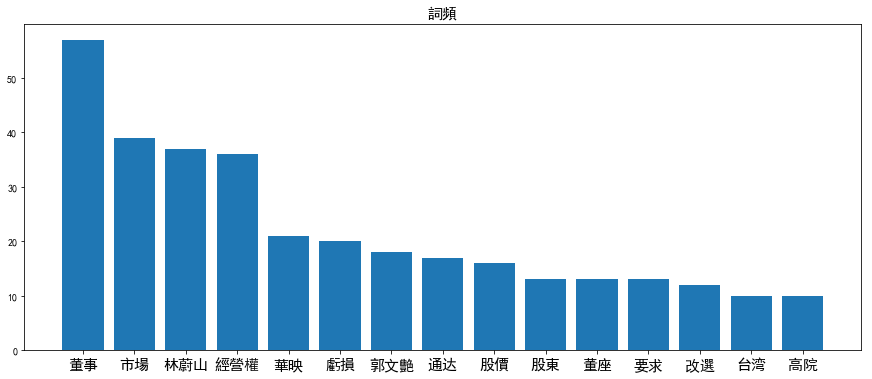

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,15),data)
plt.title("詞頻",fontsize=15)
plt.xticks(range(0,15),label,fontsize=15)

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.64144445,  0.06375381],
       [ 0.59245839, -0.20087863],
       [-0.0805966 ,  0.41510876],
       [-0.02320653,  0.57509825],
       [-0.24770995,  0.22745763],
       [ 0.11749382, -0.38206082],
       [-0.34994295, -0.41129606],
       [-0.24067837, -0.394285  ],
       [-0.12852703,  0.11428218],
       [-0.28073524, -0.00718012]])

No handles with labels found to put in legend.


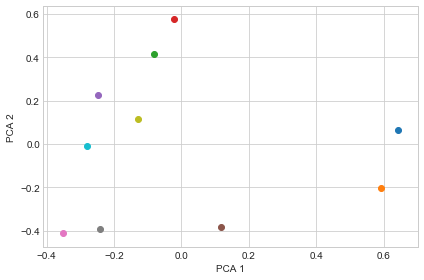

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

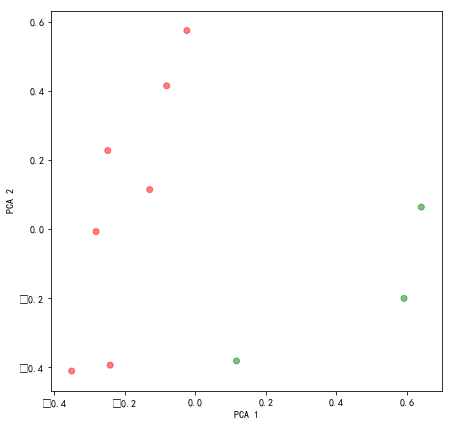

In [27]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()